In [0]:
######################################
########## DATA PREPARATION ##########
######################################

import numpy as np
import matplotlib.pyplot as plt

"""Script to download the 20 newsgroups text classification set"""
from sklearn.datasets import fetch_20newsgroups

########## TRAIN DATA ##############
# categories = ['alt.atheism' , 'soc.religion.christian' , 'comp.graphics' , 'sci.med'] # to match tutorial
twenty_train = fetch_20newsgroups(subset = 'train', remove=(['headers', 'footers', 'quotes']))
# twenty_train = fetch_20newsgroups(subset = 'train', categories=categories)

########## TEST DATA ##############
twenty_test = fetch_20newsgroups(subset = 'test', remove=(['headers', 'footers', 'quotes']))

"""Define count vectorizer and tf-idf transformations"""

###### Count Vectorizer #######
from sklearn.feature_extraction.text import CountVectorizer
### Filter out these stopwords ####
stopwords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
#### Filter: Stopwords, token_pattern filters out the non-letter characters
count_vect = CountVectorizer(analyzer='word', stop_words = stopwords,  token_pattern = r'\b[^\d\W_/]+\b')

########## TFIDF ############
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=True,smooth_idf=True) # turned on idf and smooth idf


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


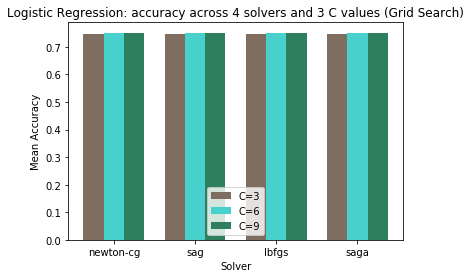

<Figure size 432x288 with 0 Axes>

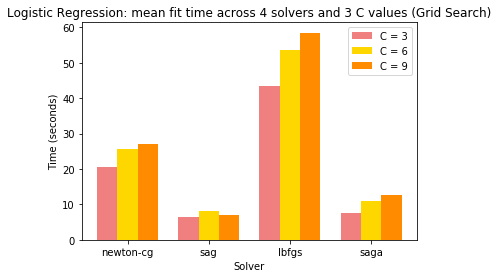

means C3: [0.74801178 0.74801178 0.74801178 0.74783495]
means C6: [0.75154699 0.75154699 0.75145857 0.75154699]
means C9: [0.75128182 0.75128182 0.75119344 0.75128182]
time C3: [20.66521301  6.4544796  43.46303635  7.50725861]
time C6: [25.58590851  8.05301347 53.68248377 11.05218024]
time C9: [27.06613631  6.87964859 58.49417267 12.73019409]


<Figure size 432x288 with 0 Axes>

In [3]:
####################################################################
### Logistic Regression: Comparing Solvers via L2 Regularization ###
####################################################################

# packages
import os
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline  
from sklearn.model_selection import GridSearchCV

logistic_clf = LogisticRegression()
logistic_reg_pipeline = Pipeline([('vect', count_vect), ('tfidf', tfidf_transformer), ('clf', logistic_clf)])

def logistic_l2_solver_validation(solver): # possible inputs: 'newton-cg', 'sag','lbfgs', 'saga'
  if not os.path.exists('logistic_regression'):
    os.makedirs('logistic_regression')
  logistic_clf = LogisticRegression()
  logistic_reg_pipeline = Pipeline([('vect', count_vect), ('tfidf', tfidf_transformer), ('clf', logistic_clf)])

  logistic_params_C3 = {'clf__penalty': ['l2'], 'clf__solver': solver, 'clf__multi_class': ['multinomial'], 'clf__max_iter': [1000], 'clf__C': [3]} # smaller C <=> stronger regularization
  logistic_reg_CV_C3 = GridSearchCV(logistic_reg_pipeline, param_grid=logistic_params_C3, cv=5, n_jobs=-1) # 5-fold CV
  logistic_reg_CV_C3.fit(twenty_train.data, twenty_train.target)

  logistic_params_C6 = {'clf__penalty': ['l2'], 'clf__solver': solver, 'clf__multi_class': ['multinomial'], 'clf__max_iter': [1000], 'clf__C': [6]} # smaller C <=> stronger regularization
  logistic_reg_CV_C6 = GridSearchCV(logistic_reg_pipeline, param_grid=logistic_params_C6, cv=5, n_jobs=-1) # 5-fold CV
  logistic_reg_CV_C6.fit(twenty_train.data, twenty_train.target)
        
  logistic_params_C9 = {'clf__penalty': ['l2'], 'clf__solver': solver, 'clf__multi_class': ['multinomial'], 'clf__max_iter': [1000], 'clf__C': [9]} # smaller C <=> stronger regularization
  logistic_reg_CV_C9 = GridSearchCV(logistic_reg_pipeline, param_grid=logistic_params_C9, cv=5, n_jobs=-1) # 5-fold CV
  logistic_reg_CV_C9.fit(twenty_train.data, twenty_train.target)

  labels = logistic_reg_CV_C3.cv_results_.get('param_clf__solver')
  C3_means = logistic_reg_CV_C3.cv_results_.get('mean_test_score')
  C6_means = logistic_reg_CV_C6.cv_results_.get('mean_test_score')
  C9_means = logistic_reg_CV_C9.cv_results_.get('mean_test_score')

  fig, ax = plt.subplots()
  index = np.arange(2)
  barWidth = 0.25
  r1 = np.arange(len(C3_means))
  r2 = [x + barWidth for x in r1]
  r3 = [x + barWidth for x in r2]
    
  rects1 = plt.bar(r1, C3_means, color='#7f6d5f', width=barWidth, label='C=3')
  rects2 = plt.bar(r2, C6_means, color='mediumturquoise', width=barWidth, label='C=6')
  rects3 = plt.bar(r3, C9_means, color='#2d7f5e',width=barWidth, label='C=9')

  plt.xlabel("Solver")
  plt.ylabel("Mean Accuracy")
  plt.title('Logistic Regression: accuracy across 4 solvers and 3 C values (Grid Search)')
  plt.xticks([r + barWidth for r in range(len(C3_means))], labels)
  plt.legend()
  plt.show()
  plt.savefig("logistic_regression/log_reg_L2_accuracy.png")

  C3_time = logistic_reg_CV_C3.cv_results_.get('mean_fit_time')
  C6_time = logistic_reg_CV_C6.cv_results_.get('mean_fit_time')
  C9_time = logistic_reg_CV_C9.cv_results_.get('mean_fit_time')

  fig, ax = plt.subplots()
  barWidth = 0.25
  r1 = np.arange(len(C3_time))
  r2 = [x + barWidth for x in r1]
  r3 = [x + barWidth for x in r2]
    
  rects1 = plt.bar(r1, C3_time, color='lightcoral', width=barWidth, label='C = 3')
  rects2 = plt.bar(r2, C6_time, color='gold', width=barWidth, label='C = 6')
  rects3 = plt.bar(r3, C9_time, color='darkorange',width=barWidth, label='C = 9')

  plt.xlabel("Solver")
  plt.ylabel("Time (seconds)")
  plt.title('Logistic Regression: mean fit time across 4 solvers and 3 C values (Grid Search)')
  plt.xticks([r + barWidth for r in range(len(C3_means))], labels)
  plt.legend()
  plt.show()
  plt.savefig("logistic_regression/log_reg_L2_time.png")
  print("means C3: "+str(C3_means))
  print("means C6: "+str(C6_means))
  print("means C9: "+str(C9_means))
  print("time C3: "+str(C3_time))
  print("time C6: "+str(C6_time))
  print("time C9: "+str(C9_time)) 
logistic_l2_solver_validation(['newton-cg', 'sag','lbfgs','saga'])

No handles with labels found to put in legend.


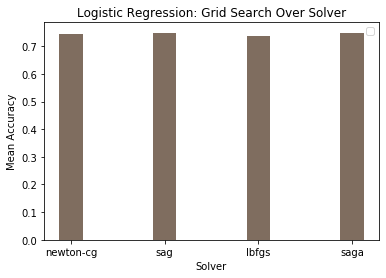

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

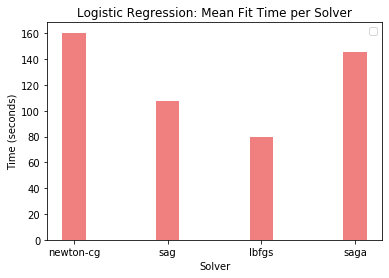

<Figure size 432x288 with 0 Axes>

In [0]:
####################################################################
### Logistic Regression: Comparing Solvers via NO Regularization ###
####################################################################

# packages
import os  
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline  
from sklearn.model_selection import GridSearchCV

logistic_clf = LogisticRegression()
logistic_reg_pipeline = Pipeline([('vect', count_vect), ('tfidf', tfidf_transformer), ('clf', logistic_clf)])

def logistic_no_reg_solver_validation(solver): # only possible inputs: 'newton-cg', 'sag','lbfgs', 'saga'
  if not os.path.exists('logistic_regression'):
    os.makedirs('logistic_regression')
  logistic_params = {'clf__penalty': ['none'], 'clf__solver': solver, 'clf__multi_class': ['multinomial'], 'clf__max_iter': [1000]} # smaller C <=> stronger regularization
  logistic_reg_CV = GridSearchCV(logistic_reg_pipeline, param_grid=logistic_params, cv=5, n_jobs=-1) # 5-fold CV
  logistic_reg_CV.fit(twenty_train.data, twenty_train.target)

  labels = logistic_reg_CV.cv_results_.get('param_clf__solver')
  means = logistic_reg_CV.cv_results_.get('mean_test_score')

  fig, ax = plt.subplots()
  index = np.arange(2)
  barWidth = 0.25
    
  rects1 = plt.bar(logistic_reg_CV.cv_results_.get('param_clf__solver'), means, color='#7f6d5f', width=barWidth)
  plt.xlabel("Solver")
  plt.ylabel("Mean Accuracy")
  plt.title('Logistic Regression: Grid Search Over Solver')
  plt.legend()
  plt.show()
  plt.savefig("logistic_regression/log_no_reg_accuracy.png")

  time = logistic_reg_CV.cv_results_.get('mean_fit_time')

  fig, ax = plt.subplots()
  barWidth = 0.25
    
  rects1 = plt.bar(logistic_reg_CV.cv_results_.get('param_clf__solver'), time, color='lightcoral', width=barWidth)
  plt.xlabel("Solver")
  plt.ylabel("Time (seconds)")
  plt.title('Logistic Regression: Mean Fit Time per Solver')
  plt.legend()
  plt.show()
  plt.savefig("logistic_regression/log_no_reg_time.png")
  print("means: "+ str(means))
  print("time: "+ str(time))
logistic_no_reg_solver_validation(['newton-cg', 'sag','lbfgs','saga'])

No handles with labels found to put in legend.


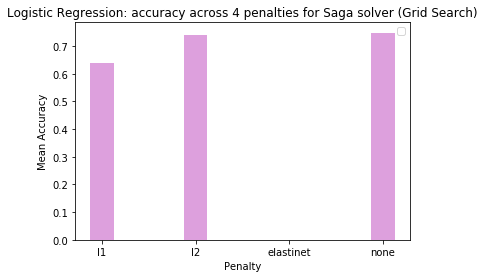

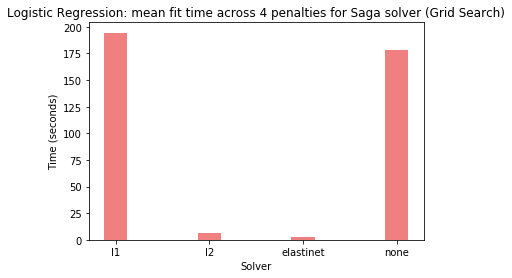

<Figure size 432x288 with 0 Axes>

In [0]:
################################################################
### Logistic Regression: Comparing Penalties for Saga Solver ###
################################################################

# packages
import os  
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline  
from sklearn.model_selection import GridSearchCV

logistic_clf = LogisticRegression()
logistic_reg_pipeline = Pipeline([('vect', count_vect), ('tfidf', tfidf_transformer), ('clf', logistic_clf)])
    
def logistic_saga_validation(penalty):
  if not os.path.exists('logistic_regression'):
    os.makedirs('logistic_regression')
  logistic_params = {'clf__penalty': penalty, 'clf__solver': ['saga'], 'clf__multi_class': ['multinomial'], 'clf__max_iter': [1000]} # smaller C <=> stronger regularization
  logistic_reg_CV = GridSearchCV(logistic_reg_pipeline, param_grid=logistic_params, cv=5, n_jobs=-1) # 5-fold CV
  logistic_reg_CV.fit(twenty_train.data, twenty_train.target)

  labels = logistic_reg_CV.cv_results_.get('param_clf__penalty')
  means = logistic_reg_CV.cv_results_.get('mean_test_score')

  fig, ax = plt.subplots()
  barWidth = 0.25
    
  rects1 = plt.bar(logistic_reg_CV.cv_results_.get('param_clf__penalty'), means, color='plum', width=barWidth)
  plt.xlabel("Penalty")
  plt.ylabel("Mean Accuracy")
  plt.title('Logistic Regression: accuracy across 4 penalties for Saga solver (Grid Search)')
  plt.legend()
  plt.savefig("logistic_regression/log_reg_saga_accuracy.png")

  time = logistic_reg_CV.cv_results_.get('mean_fit_time')

  fig, ax = plt.subplots()
    
  rects1 = plt.bar(logistic_reg_CV.cv_results_.get('param_clf__penalty'), time, color='lightcoral', width=barWidth)
  plt.xlabel("Solver")
  plt.ylabel("Time (seconds)")
  plt.title('Logistic Regression: mean fit time across 4 penalties for Saga solver (Grid Search)')
  plt.show()
  plt.savefig("logistic_regression/log_reg_saga_time.png")
  print("means: "+ str(means))
  print("time: "+ str(time))
logistic_saga_validation(['l1','l2','elastinet','none'])

In [0]:
##############################################
### Logistic Regression: Chosing Our Model ###
##############################################

# packages
import os  
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline  
from sklearn.model_selection import GridSearchCV

logistic_clf = LogisticRegression()
logistic_reg_pipeline = Pipeline([('vect', count_vect), ('tfidf', tfidf_transformer), ('clf', logistic_clf)])

def logistic_best_model(C):
  if not os.path.exists('logistic_regression'):
    os.makedirs('logistic_regression')
  
  # l2 penalty, sag solver
  logistic_params_l2 = {'clf__penalty': ['l2'], 'clf__solver': ['sag'], 'clf__multi_class': ['multinomial'], 'clf__max_iter': [1000], 'clf__C': C} # smaller C <=> stronger regularization
  logistic_reg_CV_l2 = GridSearchCV(logistic_reg_pipeline, param_grid=logistic_params_l2, cv=5, n_jobs=-1)
  logistic_reg_CV_l2.fit(twenty_train.data, twenty_train.target)
  
  # no penalty, sag solver
  logistic_params = {'clf__penalty': ['none'], 'clf__solver': ['sag'], 'clf__multi_class': ['multinomial'], 'clf__max_iter': [1000], 'clf__C': C} # smaller C <=> stronger regularization
  logistic_reg_CV = GridSearchCV(logistic_reg_pipeline, param_grid=logistic_params, cv=5, n_jobs=-1)
  logistic_reg_CV.fit(twenty_train.data, twenty_train.target)

  # l2 penalty, saga solver
  logistic_params_l2_saga = {'clf__penalty': ['l2'], 'clf__solver': ['saga'], 'clf__multi_class': ['multinomial'], 'clf__max_iter': [1000], 'clf__C': C} # smaller C <=> stronger regularization
  logistic_reg_CV_l2_saga = GridSearchCV(logistic_reg_pipeline, param_grid=logistic_params_l2_saga, cv=5, n_jobs=-1)
  logistic_reg_CV_l2_saga.fit(twenty_train.data, twenty_train.target)

  # no penalty, saga solver
  logistic_params_saga = {'clf__penalty': ['none'], 'clf__solver': ['saga'], 'clf__multi_class': ['multinomial'], 'clf__max_iter': [1000], 'clf__C': C} # smaller C <=> stronger regularization
  logistic_reg_CV_saga = GridSearchCV(logistic_reg_pipeline, param_grid=logistic_params_saga, cv=5, n_jobs=-1)
  logistic_reg_CV_saga.fit(twenty_train.data, twenty_train.target)
 
  plt.plot(list(logistic_reg_CV_l2.cv_results_.get('param_clf__C')), logistic_reg_CV_l2.cv_results_.get('mean_test_score'), label = 'sag (L2 penalty)')
  plt.plot(list(logistic_reg_CV.cv_results_.get('param_clf__C')), logistic_reg_CV.cv_results_.get('mean_test_score'), label = 'sag (no penalty)')
  plt.plot(list(logistic_reg_CV_l2_saga.cv_results_.get('param_clf__C')), logistic_reg_CV_l2_saga.cv_results_.get('mean_test_score'), label = 'saga (L2 penalty)')
  plt.plot(list(logistic_reg_CV_saga.cv_results_.get('param_clf__C')), logistic_reg_CV_saga.cv_results_.get('mean_test_score'), label = 'saga (no penalty)')

  plt.xlabel("C")
  plt.ylabel("Mean accuracy")
  plt.title("Logistic regression: accuracy over C (grid search)")
  plt.legend()
  plt.savefig("logistic_regression/log_reg_models_accuracy.png")
  plt.show()

  plt.plot(list(logistic_reg_CV_l2.cv_results_.get('param_clf__C')), logistic_reg_CV_l2.cv_results_.get('mean_fit_time'), label = 'sag (L2 penalty)')
  plt.plot(list(logistic_reg_CV.cv_results_.get('param_clf__C')), logistic_reg_CV.cv_results_.get('mean_fit_time'), label = 'sag (no penalty)')
  plt.plot(list(logistic_reg_CV_l2_saga.cv_results_.get('param_clf__C')), logistic_reg_CV_l2_saga.cv_results_.get('mean_fit_time'), label = 'saga (L2 penalty)')
  plt.plot(list(logistic_reg_CV_saga.cv_results_.get('param_clf__C')), logistic_reg_CV_saga.cv_results_.get('mean_fit_time'), label = 'saga (no penalty)')

  plt.xlabel("C")
  plt.ylabel("Mean Fit Time (seconds)")
  plt.title("Logistic regression: accuracy over C (grid search)")
  plt.legend()
  plt.savefig("logistic_regression/log_reg_models_time.png")
  plt.show()

  print("Best CV score (Sag solver, L2 penalty): " + str(logistic_reg_CV_l2.best_score_))
  print("Best estimator (Sag solver, L2 penalty): " + str(logistic_reg_CV_l2.best_params_))
  print("Test accuracy of Logistic Regression (Sag solver, L2 penalty) with best params: " + str(logistic_reg_CV_l2.best_estimator_.score(twenty_test.data, twenty_test.target)))

  print("Best CV score (Sag solver, no penalty): " + str(logistic_reg_CV.best_score_))
  print("Best estimator (Sag solver, no penalty): " + str(logistic_reg_CV.best_params_))
  print("Test accuracy of Logistic Regression (Sag solver, no penalty) with best params: " + str(logistic_reg_CV.best_estimator_.score(twenty_test.data, twenty_test.target)))

  print("Best CV score (Saga solver, L2 penalty): " + str(logistic_reg_CV_l2_saga.best_score_))
  print("Best estimator (Saga solver, L2 penalty): " + str(logistic_reg_CV_l2_saga.best_params_))
  print("Test accuracy of Logistic Regression (Saga solver, L2 penalty) with best params: " + str(logistic_reg_CV_l2_saga.best_estimator_.score(twenty_test.data, twenty_test.target)))

  print("Best CV score (Saga solver, no penalty): " + str(logistic_reg_CV_saga.best_score_))
  print("Best estimator (Saga solver, no penalty): " + str(logistic_reg_CV_saga.best_params_))
  print("Test accuracy of Logistic Regression (Saga solver, no penalty) with best params: " + str(logistic_reg_CV_saga.best_estimator_.score(twenty_test.data, twenty_test.target)))
logistic_best_model([1,2,3,4,5,6,7,8,9]):

# New Section



# New Section